# Доверительные интервалы для двух долей 

In [56]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

In [60]:
def prob(size, dead):
    return dead / size

print(prob(11037, 104), prob(11034, 189))

0.009422850412249705 0.017128874388254486


In [86]:
def odds(size, dead):
    return prob(size, dead)/(1-prob(size, dead))

print(odds(11037, 104),odds(11034, 189))
print( odds(11034, 189)/odds(11037, 104))

0.009512485136741973 0.017427385892116183
1.8320539419087138


## Загрузка данных

In [12]:
data = pd.read_csv('banner_click_stat.txt', header = None, sep = '\t')
data.columns = ['banner_a', 'banner_b']

In [13]:
data.head()

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [14]:
data.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


## Интервальные оценки долей

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [4]:
maya = np.zeros(50)
maya[0] = 1

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [30]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
import numpy as np
from numpy import sqrt

maya_mean = maya.mean()
maya_std = maya.std(ddof=1)/sqrt(len(maya))
print(maya_mean, maya_std)
print("normal interval", _tconfint_generic(maya_mean, maya_std, len(maya) - 1, 0.05, 'two-sided'))

maya_interval = proportion_confint(1, 50, method = 'wilson')
print('wilson interval for banner a [%f, %f]' % maya_interval)
print('normal interval for banner a [%f, %f]' % proportion_confint(1, 50, method = 'normal'))

0.02 0.019999999999999993
normal interval (-0.020191504689784163, 0.06019150468978417)
wilson interval for banner a [0.003539, 0.104954]
normal interval for banner a [-0.018805, 0.058805]


In [9]:
print(maya_std)

0.019999999999999993


In [55]:
z = scipy.stats.norm.ppf(1 - 0.05 / 2.)   
def getN(p):
    up = z**2 * p*(1-p)
    down = 0.01 ** 2
    return np.ceil(up/down)

print(getN(0.02))
print(scipy.stats.norm.ppf(1 - 0.003 / 2.) )

753.0
2.9677379253417944


9604.0


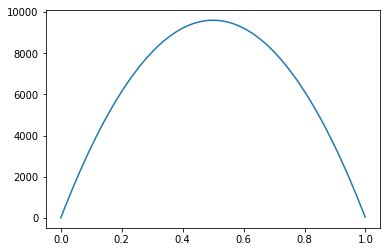

In [54]:
import matplotlib.pyplot as plt
X = list(np.arange(0, 1, 0.001))
Y = list(map(lambda x: getN(x), X))

print(max(Y))

plt.plot(X, Y)
plt.show()

In [15]:
conf_interval_banner_a = proportion_confint(sum(data.banner_a), 
                                            data.shape[0],
                                            method = 'wilson')
conf_interval_banner_b = proportion_confint(sum(data.banner_b), 
                                            data.shape[0],
                                            method = 'wilson')

In [71]:
conf_interval_aspirin = proportion_confint(104, 11037, method = 'wilson')
print('interval for banner a [%f, %f]' % conf_interval_aspirin)

interval for banner a [0.007783, 0.011404]


In [16]:
print 'interval for banner a [%f, %f]' % conf_interval_banner_a
print 'interval for banner b [%f, %f]' % conf_interval_banner_b

interval for banner a [0.026961, 0.050582]
interval for banner b [0.040747, 0.068675]


### Как их сравнить?

## Доверительный интервал для разности долей (независимые выборки)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [79]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [ ]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [ ]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [18]:
print "confidence interval: [%f, %f]" % proportions_confint_diff_ind(data.banner_a, data.banner_b)

confidence interval: [-0.034157, 0.002157]


In [1]:
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data.banner_a, data.banner_b))
print "p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind(data.banner_a, data.banner_b), 'less')

SyntaxError: invalid syntax (<ipython-input-1-2ea3b49c9256>, line 1)

In [84]:
aspirin = np.concatenate((np.ones(104), np.zeros(11037-104)))
no_aspirin = np.concatenate((np.ones(189), np.zeros(11034-189)))
print(aspirin)
print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(no_aspirin, aspirin))

[1. 1. 1. ... 0. 0. 0.]
confidence interval: [0.004688, 0.010724]


## Доверительный интервал для разности долей (связанные выборки)

  $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

In [ ]:
def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [ ]:
print "confidence interval: [%f, %f]" % proportions_confint_diff_rel(data.banner_a, data.banner_b)